In [1]:
import pandas as pd
import numpy as np
import ecopy as ep
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.colors

In [2]:
def log_shape(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print(func.__name__, result.shape)
        return result
    return wrapper

@log_shape
def start_pipeline(df):
    return df.copy()

@log_shape
def relative_abundance(x):
    k = x.div(x.sum(axis=1), axis=0)
    return k

@log_shape
def hellinger(x):
    #x_T = x.T
    x_new = x.div(x.sum(axis=1), axis=0)
    x_new_sq = np.sqrt(x_new)
    #x_new_sq_T = x_new_sq.T
    return x_new_sq

@log_shape
def sort_table (df):
    df_trans =df.T
    new_order = df_trans.sum(axis=1).sort_values(ascending=False).index.tolist()
    df = df[new_order]
    return df

@log_shape
def relative_whole(x):
    k = x.div(x.values.sum(), axis=1)
    return k

def plot_relabundance_heatmap(df, label_n):
    df_new = df.pivot_table(df.iloc[:,23:], index=df.iloc[:,1],aggfunc='mean')
    transpose_df = df_new.T
    plt.figure(figsize=(12, 8))
    plt.title(label_n)
    fig = sns.heatmap(transpose_df, annot=False)
    fig.set_xlabel("Location",fontsize=20)
    fig.set_ylabel("Family of Bacteria",fontsize=20)
    plt.savefig('relative_abundance_taxa.png')

    plt.show()

@log_shape   
def merge_meta_otu(OTU, meta):
    
    df =  OTU.merge(meta,how = "left", left_index=True, right_index=True)
    
    return df
    
def fix_column(OTU_matrix):
    
    OTU_matrix = OTU_matrix.rename(columns = {"Unnamed: 0" :"SampleID"})
    df = OTU_matrix.set_index("SampleID")

    return df

def fix_column_meta(meta):  
    
    meta = meta.rename(columns = {"#SampleID" :"SampleID"})
    df = meta.set_index("SampleID")

    return df  

# Bacteria Heatmap

### Read in the OTU or ASV matrix

In [3]:
OTU_matrix = pd.read_csv("/home/robert/Projects/microbiome-a.incompertus/scripts/taxonomic.bacteria.csv")

In [4]:
meta = pd.read_csv("Metadata_with_Host.tsv", sep='\t').pipe(fix_column_meta)

In [5]:
meta.head()

,Sample_ID,Location,Collected,Stored_in_Celsius,Tree,Gallery,Host,Raffaelea,Diameter,Gender,...,Latidude,Elevation,Nanodrop,260_280,260_230,Qubit_ng_ml,Qubit_ng_μl,Total_DNA_in_ng,ITS_Amp,Description
SampleID,,,,,,,,,,,,,,,,,,,,,
RM37,P1,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,29.5,2.00,1.78,201.0,4.02,188.94,Y,NaN
RM38,P2,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,28.9,1.84,1.15,183.0,3.66,172.02,Y,NaN
RM39,P3,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,28.6,1.81,1.43,182.0,3.64,171.08,Y,NaN
RM40,P4,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,23.2,1.83,1.44,156.0,3.12,146.64,Y,NaN
RM41,P5,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,yes,36.0,Female,...,151.3519,432.207,26.9,1.90,1.30,186.0,3.72,174.84,Y,NaN


### We have a lot of zeros, so lets use the hellinger transformation. We have to write the function for that.

In [6]:
data_end = (OTU_matrix.pipe(start_pipeline)
            .pipe(fix_column)
            .pipe(hellinger).pipe(relative_abundance)
            .pipe(merge_meta_otu, meta))

start_pipeline (154, 139)
hellinger (154, 138)
relative_abundance (154, 138)
merge_meta_otu (154, 160)


In [190]:
data_end.head()

,0319-6G20,0319-6M6,11-24,1174-901-12,288-2,480-2,A0839,ABS-19,Acetobacteraceae,Acidimicrobiaceae,...,Latidude,Elevation,Nanodrop,260_280,260_230,Qubit_ng_ml,Qubit_ng_μl,Total_DNA_in_ng,ITS_Amp,Description
SampleID,,,,,,,,,,,,,,,,,,,,,
RM1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.168728,0.0,...,152.7985,739.2708,15.3,1.71,0.59,40.4,0.808,37.976,N,NaN
RM10,0.0,0.0,0.0,0.055201,0.0,0.0,0.0,0.0,0.036099,0.0,...,152.7982,764.9861,13.0,1.75,1.06,47.1,0.942,44.274,Y,NaN
RM100,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.167742,0.0,...,150.3634,90.6850,45.4,1.84,1.54,164.0,3.280,154.160,Y,NaN
RM101,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,150.3634,90.6850,41.7,1.87,1.56,42.8,0.856,40.232,Y,NaN
RM102,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,150.3634,90.6850,39.3,1.85,1.18,44.7,0.894,42.018,Y,NaN


### Now get the relative abundance of each taxa. Again we have to write our little function.

Check: Each sample should add up to 1

In [198]:
data_end.iloc[:, :138].sum(axis=1).head()

SampleID
RM1      1.0
RM10     1.0
RM100    1.0
RM101    1.0
RM102    1.0
dtype: float64

### Now our data is transformed and we can compute relative abundances. Now we have to get our meta data and link it to the species abundance table

/home/robert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [50]:
meta.head()

,Sample_ID,Location,Collected,Stored_in_Celsius,Tree,Gallery,Host,Raffaelea,Diameter,Gender,...,Latidude,Elevation,Nanodrop,260_280,260_230,Qubit_ng_ml,Qubit_ng_μl,Total_DNA_in_ng,ITS_Amp,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
RM37,P1,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,29.5,2.00,1.78,201.0,4.02,188.94,Y,NaN
RM38,P2,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,28.9,1.84,1.15,183.0,3.66,172.02,Y,NaN
RM39,P3,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,28.6,1.81,1.43,182.0,3.64,171.08,Y,NaN
RM40,P4,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,151.3519,432.207,23.2,1.83,1.44,156.0,3.12,146.64,Y,NaN
RM41,P5,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,yes,36.0,Female,...,151.3519,432.207,26.9,1.90,1.30,186.0,3.72,174.84,Y,NaN


In [52]:
df.head()

,Sample_ID,Location,Collected,Stored_in_Celsius,Tree,Gallery,Host,Raffaelea,Diameter,Gender,...,unidentified,Unknown Family,vadinBB60,Veillonellaceae,Vibrionaceae,Xanthobacteraceae,Xanthomonadaceae,Xanthomonadales Incertae Sedis,Xiphinematobacteraceae,YNPFFP1
RM37,P1,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,0.089524,0.000000,0.000000,0.0,0.0,0.0,0.055787,0.0,0.0,0.000000
RM38,P2,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,0.056351,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
RM39,P3,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,0.098236,0.090604,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.023748
RM40,P4,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,no,36.0,Female,...,0.083461,0.045660,0.046194,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
RM41,P5,Olney,2017.0,-80.0,2.0,B,Eucalyptus_pilularis,yes,36.0,Female,...,0.118583,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.048286


### Now we can plot a heatmap. However, on the relative abundances.

We want tot plot it by Location first:

start_pipeline (154, 160)


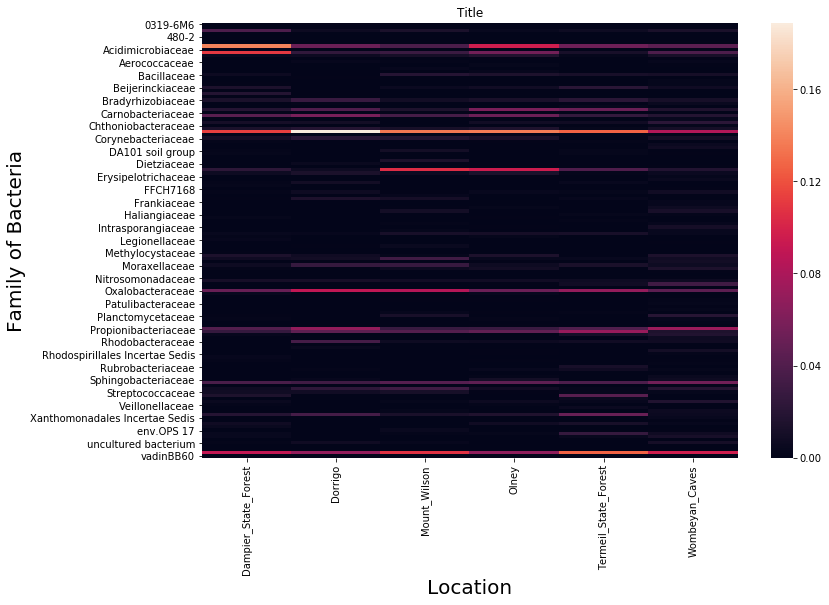

AttributeError: 'NoneType' object has no attribute 'pipe'

In [55]:
df_heatmap = (df.pipe(start_pipeline)
              .pipe(plot_relabundance_heatmap, "Title")
              .pipe(sort_table))

Quite messy. Furthermore, its not sorted by highest to lowest abundant

First sort them:

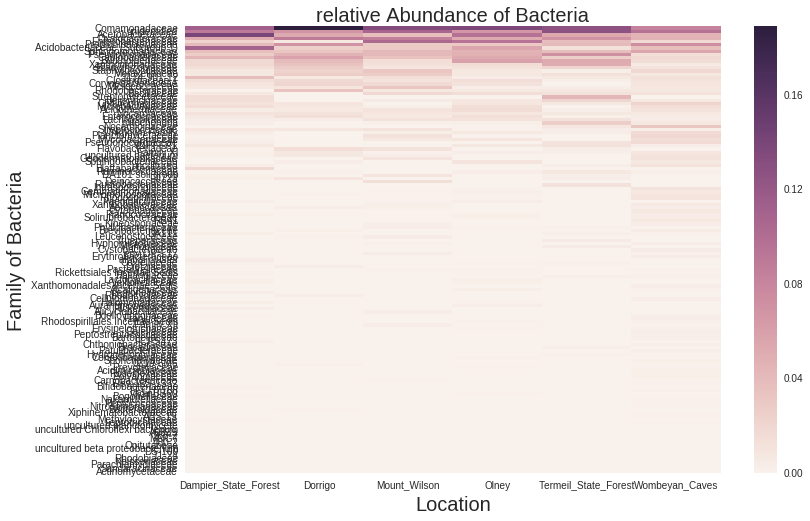

In [20]:
plt.figure(figsize=(12, 8))
plt.title('relative Abundance of Bacteria', fontsize=20)
fig = sns.heatmap(df_sort.T, annot=False)
fig.set_xlabel("Location",fontsize=20)
fig.set_ylabel("Family of Bacteria",fontsize=20)


plt.savefig('relative_abundance_taxa.png')

plt.show()

In [21]:
#Exculude taxa below 0.05 percent
new = df_sort[df_sort.columns[df_sort.sum()>0.05]]

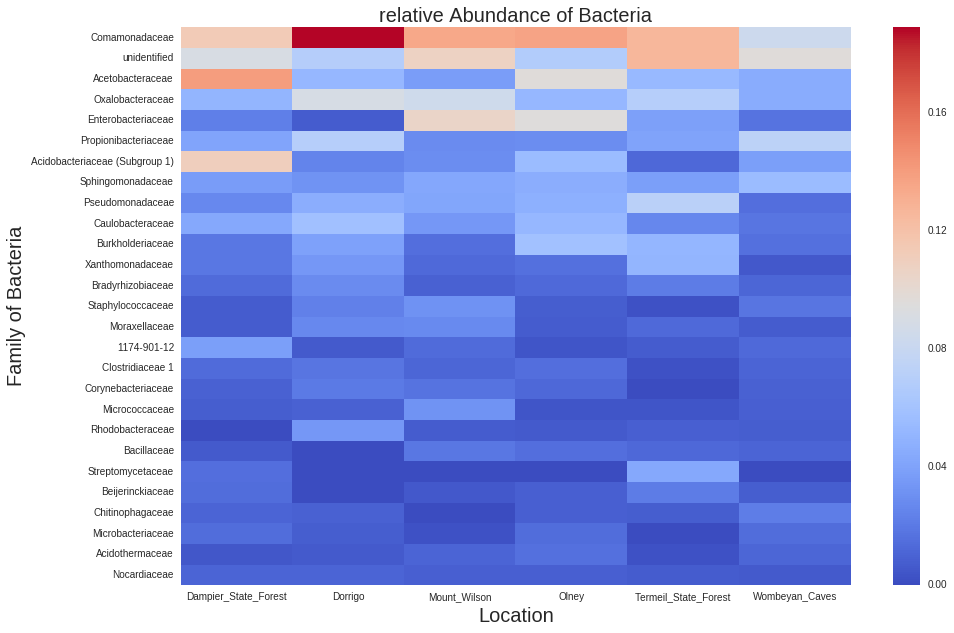

In [80]:
plt.figure(figsize=(15, 10))
plt.title('relative Abundance of Bacteria', fontsize=20)
fig = sns.heatmap(new.T, annot=False, cmap="coolwarm")
fig.set_xlabel("Location",fontsize=20)
fig.set_ylabel("Family of Bacteria",fontsize=20)


plt.savefig('relative_abundance_taxa.png')

plt.show()

### Calculate a new matrix: devide each value in a column by the total sum of the whole dataframe

In [49]:
OTU_matrix.head()

,0319-6G20,0319-6M6,11-24,1174-901-12,288-2,480-2,A0839,ABS-19,Acetobacteraceae,Acidimicrobiaceae,...,unidentified,Unknown Family,vadinBB60,Veillonellaceae,Vibrionaceae,Xanthobacteraceae,Xanthomonadaceae,Xanthomonadales Incertae Sedis,Xiphinematobacteraceae,YNPFFP1
RM1,0,0,0,0,0,0,0,0,720,0,...,220,0,0,0,0,0,0,0,0,0
RM10,0,0,0,159,0,0,0,0,68,0,...,0,0,0,0,0,0,148,0,0,0
RM100,0,0,0,0,0,0,0,0,262,0,...,61,0,0,0,0,0,83,0,0,0
RM101,0,0,0,0,0,0,0,0,0,0,...,157,0,0,0,0,0,99,0,0,0
RM102,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0


In [50]:
OTU_matrix.values.sum()

999569

In [51]:
OTU_total = relative_whole(OTU_matrix)

In [52]:
OTU_total.head()

,0319-6G20,0319-6M6,11-24,1174-901-12,288-2,480-2,A0839,ABS-19,Acetobacteraceae,Acidimicrobiaceae,...,unidentified,Unknown Family,vadinBB60,Veillonellaceae,Vibrionaceae,Xanthobacteraceae,Xanthomonadaceae,Xanthomonadales Incertae Sedis,Xiphinematobacteraceae,YNPFFP1
RM1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000720,0.0,...,0.000220,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
RM10,0.0,0.0,0.0,0.000159,0.0,0.0,0.0,0.0,0.000068,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000148,0.0,0.0,0.0
RM100,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000262,0.0,...,0.000061,0.0,0.0,0.0,0.0,0.0,0.000083,0.0,0.0,0.0
RM101,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000157,0.0,0.0,0.0,0.0,0.0,0.000099,0.0,0.0,0.0
RM102,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [53]:
OTU_total.sum(axis=1).head()

RM1      0.005853
RM10     0.003055
RM100    0.001161
RM101    0.000462
RM102    0.000501
dtype: float64

In [54]:
df_total = pd.merge(meta, OTU_total, left_index=True, right_index=True)

In [55]:
df_new_total = df_total.pivot_table(df_total.iloc[:,23:], index=df_total.iloc[:,1],aggfunc='mean')

In [56]:
df_sort_total = sort_table(df_new_total)

In [78]:
new_total = df_sort_total[df_sort_total.columns[df_sort_total.sum()>0]]

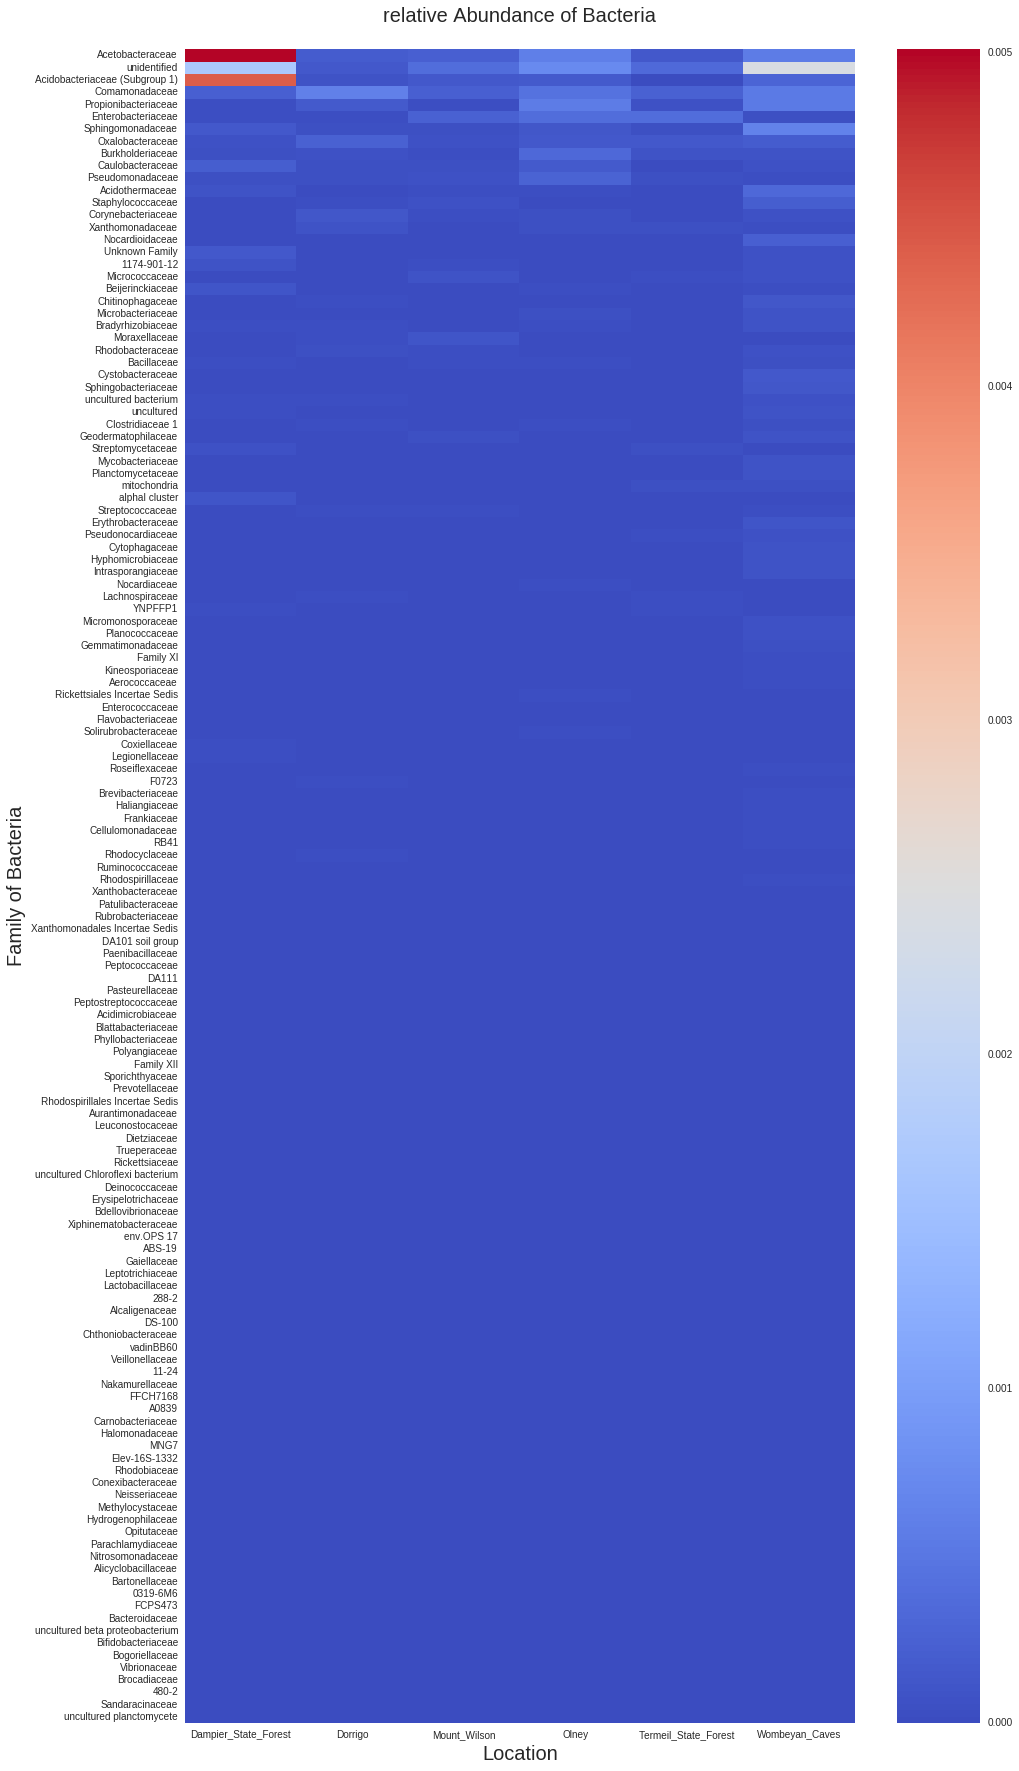

In [135]:
plt.figure(figsize=(15, 30))
plt.title('relative Abundance of Bacteria\n', fontsize=20)
fig = sns.heatmap(new_total.T, annot=False, cmap="coolwarm")
fig.set_xlabel("Location",fontsize=20)
fig.set_ylabel("Family of Bacteria",fontsize=20)


plt.savefig('relative_abundance_taxa.png')

plt.show()

## Frequency of Bacteria in each Location

##### Convert OTU-Matrix to presence/absence matrix

In [84]:
OTU_matrix_pa = pd.DataFrame(ep.transform(OTU_matrix, method='pa'))

In [85]:
OTU_matrix_pa.head()

,0319-6G20,0319-6M6,11-24,1174-901-12,288-2,480-2,A0839,ABS-19,Acetobacteraceae,Acidimicrobiaceae,...,unidentified,Unknown Family,vadinBB60,Veillonellaceae,Vibrionaceae,Xanthobacteraceae,Xanthomonadaceae,Xanthomonadales Incertae Sedis,Xiphinematobacteraceae,YNPFFP1
RM1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
RM10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
RM100,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
RM101,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
RM102,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Merge pa OTU-matrix with the metadata

In [86]:
df_pa = pd.merge(meta, OTU_matrix_pa, left_index=True, right_index=True)

In [87]:
df_new_pa = df_pa.pivot_table(df_pa.iloc[:,23:], index=df_pa.iloc[:,1],aggfunc='mean')

In [88]:
df_sort_pa = sort_table(df_new_pa)

In [89]:
#Exculude taxa below 0.05 percent
new_pa = df_sort_pa[df_sort_pa.columns[df_sort_pa.sum()>0.5]]

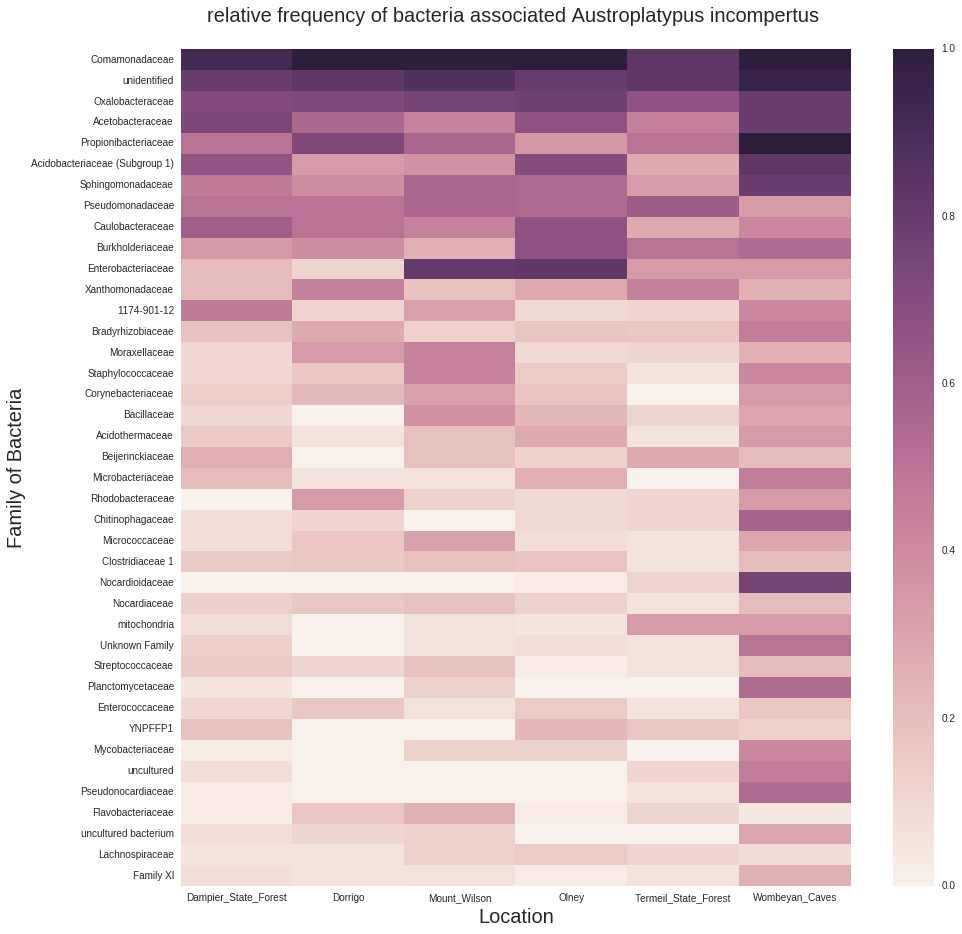

In [94]:
plt.figure(figsize=(15, 15))
plt.title('relative frequency of bacteria associated Austroplatypus incompertus \n', fontsize=20)
fig = sns.heatmap(new_pa.T, annot=False)
fig.set_xlabel("Location",fontsize=20)
fig.set_ylabel("Family of Bacteria",fontsize=20)


plt.savefig('relative_frequency_taxa-bacteria.pdf', format="pdf")
plt.savefig('relative_frequency_taxa-bacteria.jpeg')

plt.show()

### Alpha-diversity of Bacteria in each Location 

#### Shannon-Index

In [112]:
shannon_H = pd.DataFrame(ep.diversity(df.iloc[:,23:], method='shannon'))

In [113]:
shannon_H.head()

,0
0,14.415017
1,11.705526
2,9.441796
3,10.758217
4,9.673977


In [114]:
shannon_H.columns  = ["Shannon_Index"]

In [115]:
shannon_H.head()

,Shannon_Index
0,14.415017
1,11.705526
2,9.441796
3,10.758217
4,9.673977


In [116]:
shannon_H.index = df.index

In [117]:
result = df.join(shannon_H)

In [118]:
result["Shannon_Index"].head()

RM37    14.415017
RM38    11.705526
RM39     9.441796
RM40    10.758217
RM41     9.673977
Name: Shannon_Index, dtype: float64

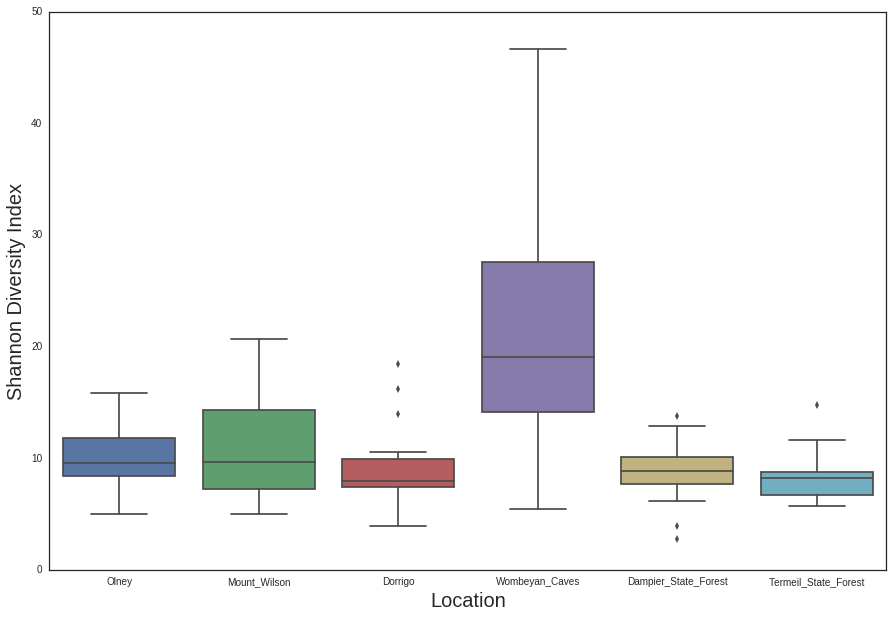

In [119]:
plt.figure(figsize=(15, 10))
sns.set_style(style="white")
fig = sns.boxplot(x="Location", y="Shannon_Index", data=result)
fig.set_ylabel("Shannon Diversity Index",fontsize=20)
fig.set_xlabel("Location",fontsize=20)
plt.savefig("boxplot.pdf", format="pdf")

#### Species Richness

In [127]:
sp_richness = pd.DataFrame(ep.diversity(df.iloc[:,23:], method='spRich'))

In [128]:
sp_richness.columns  = ["Richness"]

In [129]:
sp_richness.index = df.index

In [130]:
result_richness = df.join(sp_richness)

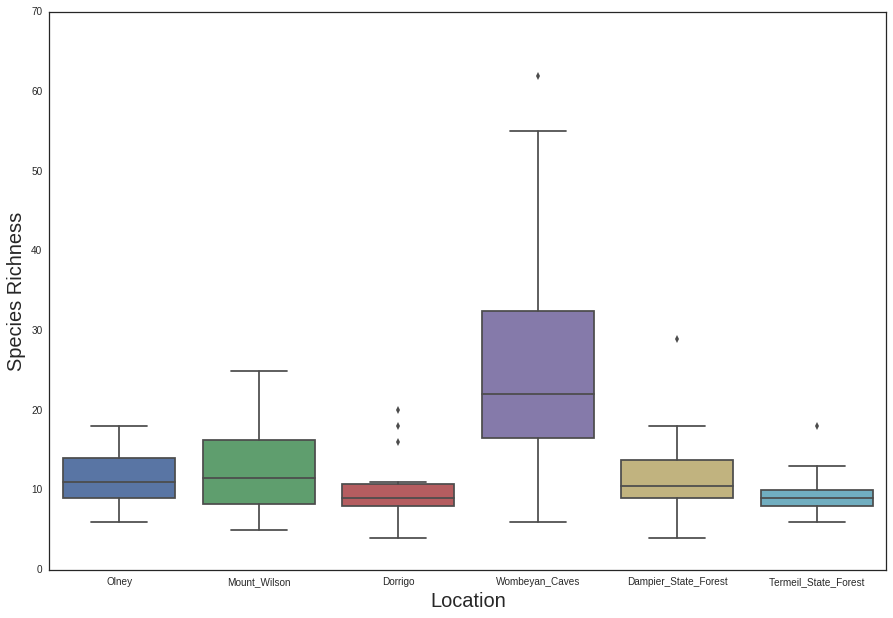

In [131]:
plt.figure(figsize=(15, 10))
sns.set_style(style="white")
fig = sns.boxplot(x="Location", y="Richness", data=result_richness)
fig.set_ylabel("Species Richness",fontsize=20)
fig.set_xlabel("Location",fontsize=20)
plt.savefig("boxplot_richness.pdf", format="pdf")